#  Data Exploration
### Objectives 
---------------------------------------------------------------------
    1) Understand structure of data 
    2) Prototype variable transforms
    3) Fiddle with overly simplisctic spline fit model 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplt
import math
import time
%matplotlib inline  
plt.style.use('ggplot')
#load in the raw data 
df=pd.read_csv('Strategy_Data_Set.csv',parse_dates=['trial_date','subscription_date'], infer_datetime_format=True)

## Prototype variable transforms
    Lambda functions to apply to the df to calculate more columns

This kind of spoils some of my conclusions but I like to keep all of my dataframe manipulation in one cell so I don't run into
versioning issues when developing. <br>

##### <b><span style="color:red">Warning: this code might take a while to run</span></b>
<span style="color:blue">If you dont want to run this and you just want the anotated data skip this cell and uncomment the 2 lines in the cell below</span>

In [31]:
a=time.time()
print('Starting Anotation')
# add Label 
df['sub_label']=df.apply(lambda x :0 if math.isnan(x.sub_hour_start)  else 1, axis=1)
# add time values
print('Starting Time Conversion')
df['trial_dateTime']=df.apply(lambda x :x.trial_date +pd.Timedelta(x.trial_hour,'h'), axis=1) 
df['sub_dateTime']=df.apply(lambda x :x.subscription_date +pd.Timedelta(x.sub_hour_start,'h'), axis=1)   
df['subLag']=df['sub_dateTime']-df['trial_dateTime']
# add count of country for diagnostic purposes 
cTrials=df.id.groupby([df['trial_country']]).count()
df['country_count']=df.apply(lambda x :cTrials.get(x.trial_country), axis=1) 
# add country codes in 
print('Starting Country Codes')
df['us']=df.apply(lambda x : 1 if x.trial_country == 'United States' else 0,axis=1)
df['uk']=df.apply(lambda x :1 if x.trial_country == 'United Kingdom' else 0,axis=1)
df['can']=df.apply(lambda x :1 if x.trial_country == 'Canada' else 0,axis=1)
df['aus']=df.apply(lambda x :1 if x.trial_country == 'Australia' else 0,axis=1)
# add in day of the week codes 
print('Starting Day of the Week')
df['mon']=df.apply(lambda x : 1 if x.day_of_week == 'Monday' else 0,axis=1)
df['tueWed']=df.apply(lambda x :1 if x.day_of_week == 'Tuesday' or x.day_of_week == 'Wednesday' else 0,axis=1)
df['sunSat']=df.apply(lambda x :1 if x.day_of_week == 'Sunday' or x.day_of_week == 'Saturday' else 0,axis=1)
df['thr']=df.apply(lambda x :1 if x.day_of_week == 'Thursday' else 0,axis=1)
#Not needed 
#df['fri']=df.apply(lambda x :1 if x.day_of_week == 'Friday' else 0,axis=1)
b=time.time()
print ('Runtime: ' + str(b-a))
df.to_csv('Anotated_Strategy_Data_Set.csv')

Starting Anotation
Starting Time Conversion
Starting Country Codes
Starting Day of the Week
Runtime: 156.87822198867798


This is not insignifcant but I am running on my not very fast laptop on battery power [161.691 secs]

In [3]:
# load data from anotated csv if it is in your local directory 
df=pd.read_csv('Anotated_Strategy_Data_Set.csv',parse_dates=['trial_date','subscription_date','trial_dateTime','sub_dateTime'], infer_datetime_format=True)
# I dont think you can parse time deltas 
df['subLag']=df['sub_dateTime']-df['trial_dateTime']

In [55]:
# check for duplicate id's -> duplicate records 
print(len(df.index))
print(len(np.unique(df.id.ravel())))
# we notice there is one duplicate :( TODO: how to handle this guy 

74891
74890


In [53]:
# remove duplicate 
print(df[df.duplicated('id')==True])
df=df.drop_duplicates('id', keep='last')

                             id trial_date  trial_hour day_of_week  \
14833  51893b4ce4b0815517460f9c 2013-05-07          13     Tuesday   

      trial_country subscription_date  sub_hour_start  
14833       Bahamas        2013-05-07            17.0  


In [6]:
# check to seeif anything funky is going on with the timestamps 
df[df.trial_dateTime>df.sub_dateTime]

,Unnamed: 0,id,trial_date,trial_hour,day_of_week,trial_country,subscription_date,sub_hour_start,sub_label,trial_dateTime,...,country_count,us,uk,can,aus,mon,tueSun,wedSat,thr,fri


There are no suspicious records found here 

In [135]:
# 'null' strings avoided detection at first but after looking at the histogram I sniffed them out 
df[df.trial_country == 'null'].sample(5)

,Unnamed: 0,id,trial_date,trial_hour,day_of_week,trial_country,subscription_date,sub_hour_start,sub_label,trial_dateTime,...,country_count,us,uk,can,aus,mon,tueSun,wedSat,thr,fri
47785,47785,519a5508e4b0396ef9063827,2013-05-20,12,Monday,null,NaT,NaN,0,2013-05-20 12:00:00,...,996,0,0,0,0,1,0,0,0,0
4651,4651,5182e97de4b065e39b3bbcd1,2013-05-02,18,Thursday,null,NaT,NaN,0,2013-05-02 18:00:00,...,996,0,0,0,0,0,0,0,1,0
48467,48467,519a5284e4b0f314fe949fb2,2013-05-20,12,Monday,null,NaT,NaN,0,2013-05-20 12:00:00,...,996,0,0,0,0,1,0,0,0,0
47576,47576,519a50ade4b00dab067d2c88,2013-05-20,12,Monday,null,NaT,NaN,0,2013-05-20 12:00:00,...,996,0,0,0,0,1,0,0,0,0
47786,47786,519a5508e4b0be74de0d0323,2013-05-20,12,Monday,null,NaT,NaN,0,2013-05-20 12:00:00,...,996,0,0,0,0,1,0,0,0,0


I think it is safe to leave them in.  In our currrent aproach they will be bundled into the rest of the 'rare' countries and the rest of the data seems valid.  They do seem to have  low percentage of subscribers though. 

In [8]:
if df[df.trial_date.isnull()].shape[0]+df[df.trial_hour.isnull()].shape[0]+df[df.day_of_week.isnull()].shape[0] >0:
    print ('we have some null values to chase down')
    

In [ ]:
#Eventaul home for the cohort lag function and the apply 

In [ ]:
#End of data manipulation 
df.to_csv('Anotated_Strategy_Data_Set.csv')

we have no null values in the rest of our columns we are assuming we have data 

## Histograms

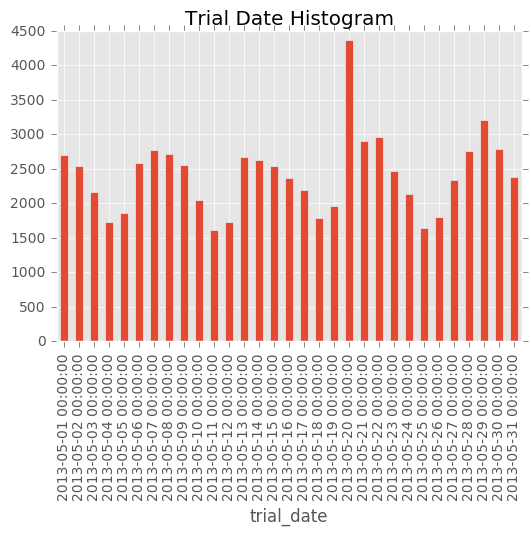

In [9]:
# lets look at some histograms of the data 
df.groupby('trial_date').size().plot(kind='bar')
pyplt.title('Trial Sate Date Histogram')

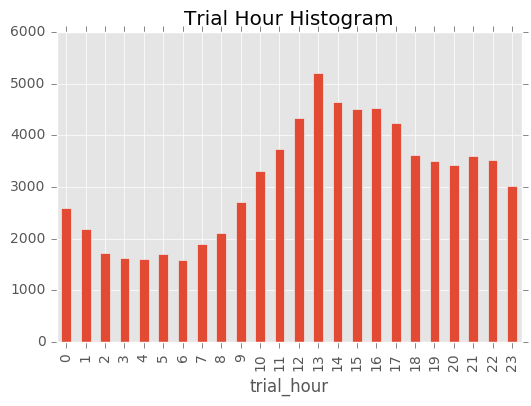

In [10]:
df.groupby('trial_hour').size().plot(kind='bar')
pyplt.title('Trial Hour Histogram')
pyplt.show()

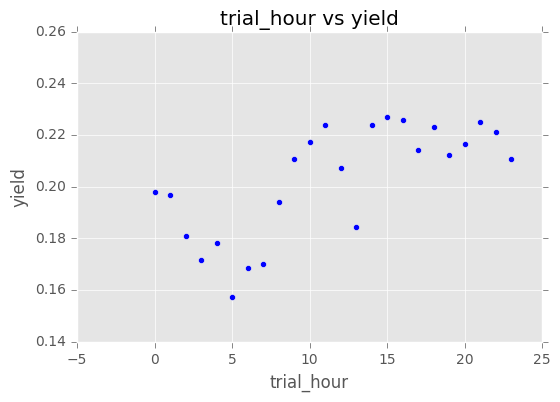

In [28]:
numS=df.sub_label.groupby([df['trial_hour']]).sum()/df.sub_label.groupby([df['trial_hour']]).count()
numS0=df.trial_hour.unique()
pyplt.scatter(numS0, numS)
pyplt.title('trial_hour vs yield')
pyplt.xlabel('trial_hour')
pyplt.ylabel('yield')
pyplt.show()

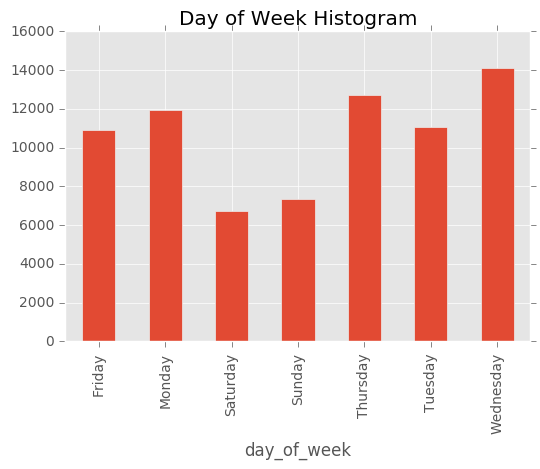

In [11]:
df.groupby('day_of_week').size().plot(kind='bar')
pyplt.title('Day of Week Histogram')
pyplt.show()

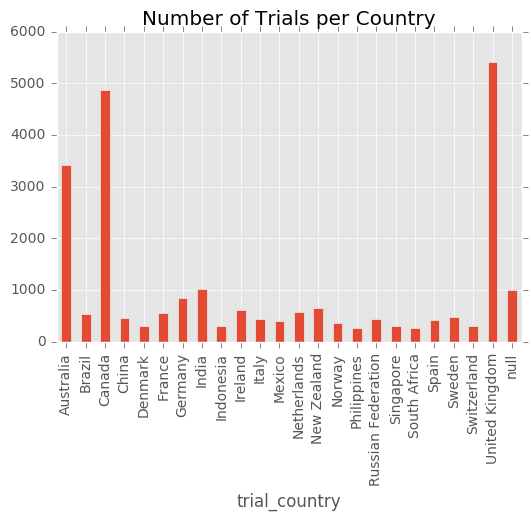

In [12]:
# i am removing us data because it makes the chart useless for all the other countries 
countrydf=df[df.trial_country!='United States'].groupby('trial_country').size() #select popular countries 
countrydf[countrydf>250].plot(kind='bar')
pyplt.title('Number of Trials per Country')
pyplt.show()
# the null values here are ~ interesting ~ 

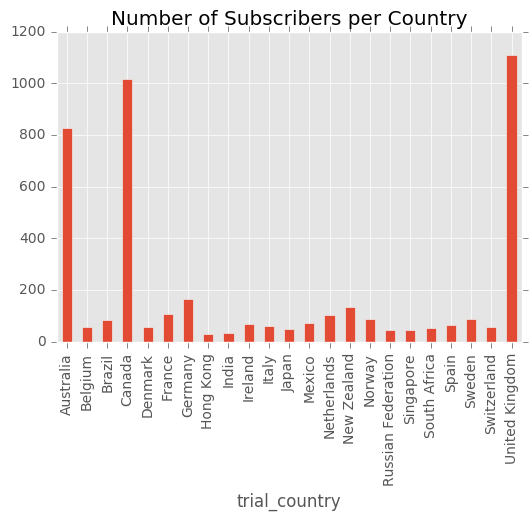

In [13]:
sdf=df[(df.subscription_date.notnull()) & (df.trial_country!='United States')]
scountrydf=sdf.groupby('trial_country').size() #select popular countries 
scountrydf[scountrydf>30].plot(kind='bar')
pyplt.title('Number of Subscribers per Country')
pyplt.show()

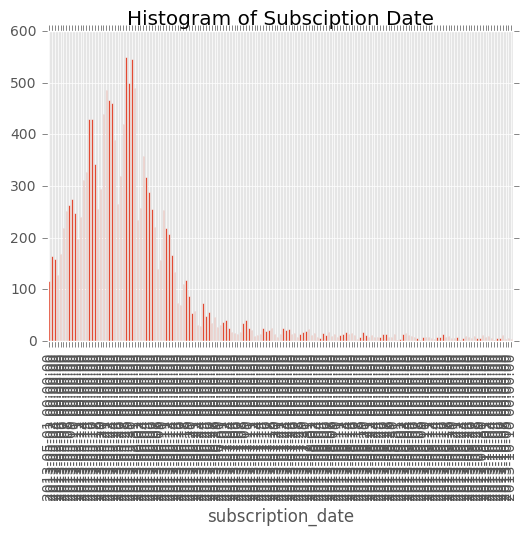

In [14]:
df.groupby('subscription_date').size().plot(kind='bar')
# this data isn't very useful we need a variable transform -> subLag
pyplt.title('Histogram of Subsciption Date')
# this is junk but generated it regardless 
pyplt.show()

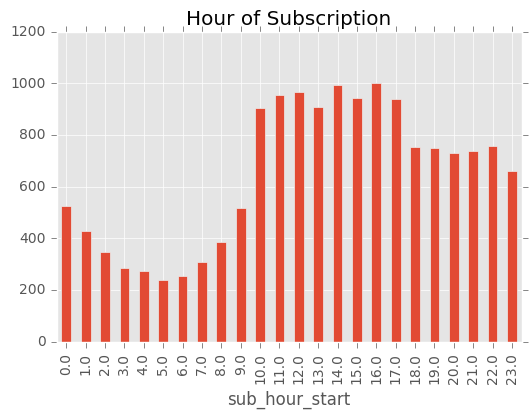

In [15]:
df.groupby('sub_hour_start').size().plot(kind='bar')
pyplt.title('Hour of Subscription')
pyplt.show()

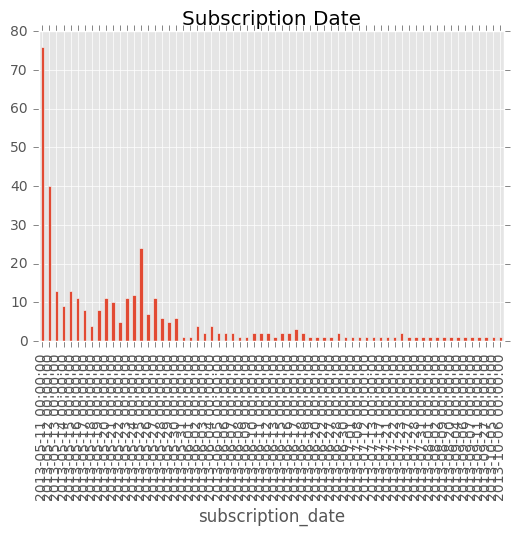

In [16]:
sample=df[df.trial_date == '5/11/2013']
ax=sample.groupby('subscription_date').size().plot(kind='bar')
pyplt.title('Sample Subscription Date')
pyplt.show()

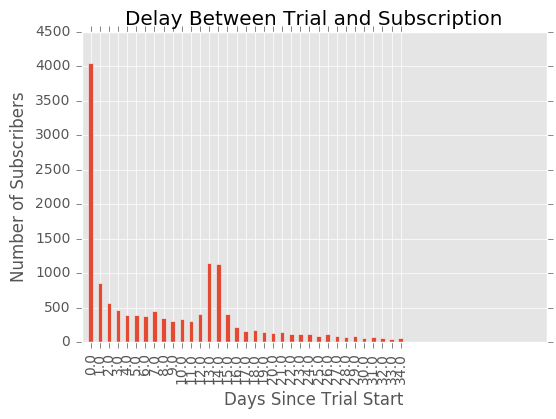

In [8]:
sdf=df[df.subLag < np.timedelta64(5,'W')]
toPlot=sdf.subLag.groupby([df.subLag.dt.days]).count()
toPlot.plot(kind="bar")
pyplt.title('Delay Between Trial and Subscription')
pyplt.ylabel('Number of Subscribers')
pyplt.xlabel('Days Since Trial Start')
pyplt.xlim([-1,50])
pyplt.show()

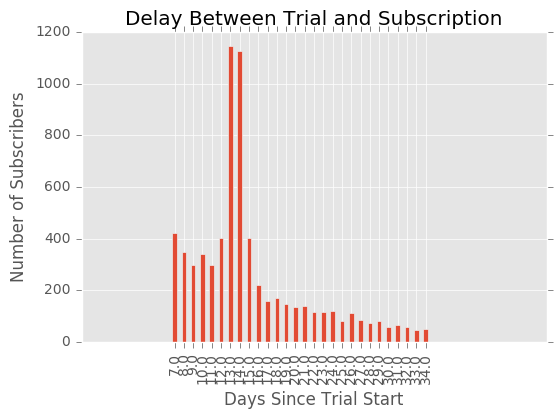

In [13]:
sdf=df[(df.subLag < np.timedelta64(5,'W'))&(df.subLag > np.timedelta64(1,'W'))]
toPlot=sdf.subLag.groupby([df.subLag.dt.days]).count()
toPlot.plot(kind="bar")
pyplt.title('Delay Between Trial and Subscription')
pyplt.ylabel('Number of Subscribers')
pyplt.xlabel('Days Since Trial Start')
pyplt.xlim([-10,40])
pyplt.show()

### Country Field Exploration 
    I am searching for the transform to expand on  this data to feed into classifiers 

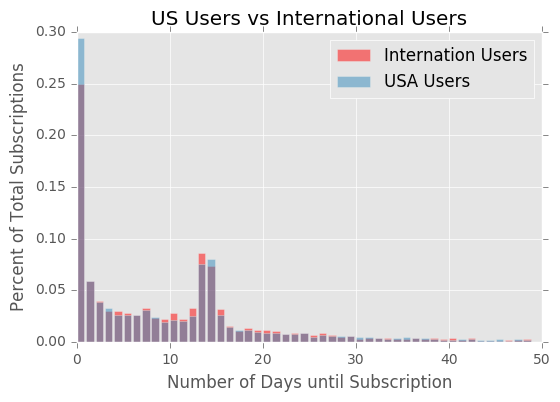

In [18]:
internationSubs=df[(df.subLag < np.timedelta64(7,'W'))&(df.trial_country!='United States')]
internationPlot=internationSubs.subLag.groupby([df.subLag.dt.days]).count()
usaSubs=df[(df.subLag < np.timedelta64(7,'W'))&(df.trial_country=='United States')]
usaPlot=usaSubs.subLag.groupby([df.subLag.dt.days]).count()
inorm=internationPlot/sum(internationPlot)
unorm=usaPlot/sum(usaPlot)
pyplt.bar(inorm.index,inorm, alpha=0.5,color='Red', label='Internation Users')
pyplt.bar(unorm.index,unorm, alpha=0.5, label='USA Users')
pyplt.title('US Users vs International Users')
pyplt.legend(loc='upper right')
pyplt.xlabel('Number of Days until Subscription')
pyplt.ylabel('Percent of Total Subscriptions')
pyplt.show()

This is an interesting discovery and indicates that US users tend to have more day 0 signups.  This means at least this variable should be in final data. 
### Lets examine other populer countries and see if they also have unique trends. 
I am going to start with the 2nd most popular country the United Kingdom 

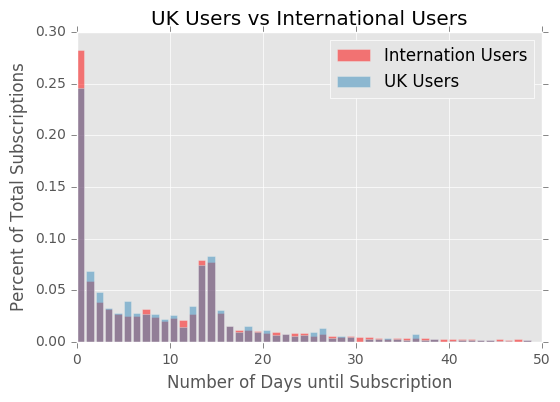

In [19]:
internationSubs=df[(df.subLag < np.timedelta64(7,'W'))&(df.trial_country!='United Kingdom')]
internationPlot=internationSubs.subLag.groupby([df.subLag.dt.days]).count()
usaSubs=df[(df.subLag < np.timedelta64(7,'W'))&(df.trial_country=='United Kingdom')]
usaPlot=usaSubs.subLag.groupby([df.subLag.dt.days]).count()
inorm=internationPlot/sum(internationPlot)
unorm=usaPlot/sum(usaPlot)
pyplt.bar(inorm.index,inorm, alpha=0.5,color='Red', label='Internation Users')
pyplt.bar(unorm.index,unorm, alpha=0.5, label='UK Users')
pyplt.title('UK Users vs International Users')
pyplt.legend(loc='upper right')
pyplt.xlabel('Number of Days until Subscription')
pyplt.ylabel('Percent of Total Subscriptions')
pyplt.show()

Interesting, it's looking like UK users look kind of like US users with a high percentage of users subscribing within 24 hours of their trial starting. Let's look at the US vs UK breakdwon to see if there are substantive differences. 

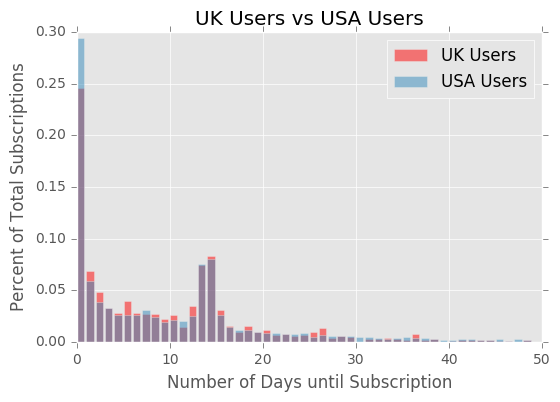

In [20]:
internationSubs=df[(df.subLag < np.timedelta64(7,'W'))&(df.trial_country=='United Kingdom')]
internationPlot=internationSubs.subLag.groupby([df.subLag.dt.days]).count()
usaSubs=df[(df.subLag < np.timedelta64(7,'W'))&(df.trial_country=='United States')]
usaPlot=usaSubs.subLag.groupby([df.subLag.dt.days]).count()
inorm=internationPlot/sum(internationPlot)
unorm=usaPlot/sum(usaPlot)
pyplt.bar(inorm.index,inorm, alpha=0.5,color='Red', label='UK Users')
pyplt.bar(unorm.index,unorm, alpha=0.5, label='USA Users')
pyplt.title('UK Users vs USA Users')
pyplt.legend(loc='upper right')
pyplt.xlabel('Number of Days until Subscription')
pyplt.ylabel('Percent of Total Subscriptions')
pyplt.show()

It looks like the USA still leads signicantly in same day subscribers
Now let's look next most popular countries canada and australia 

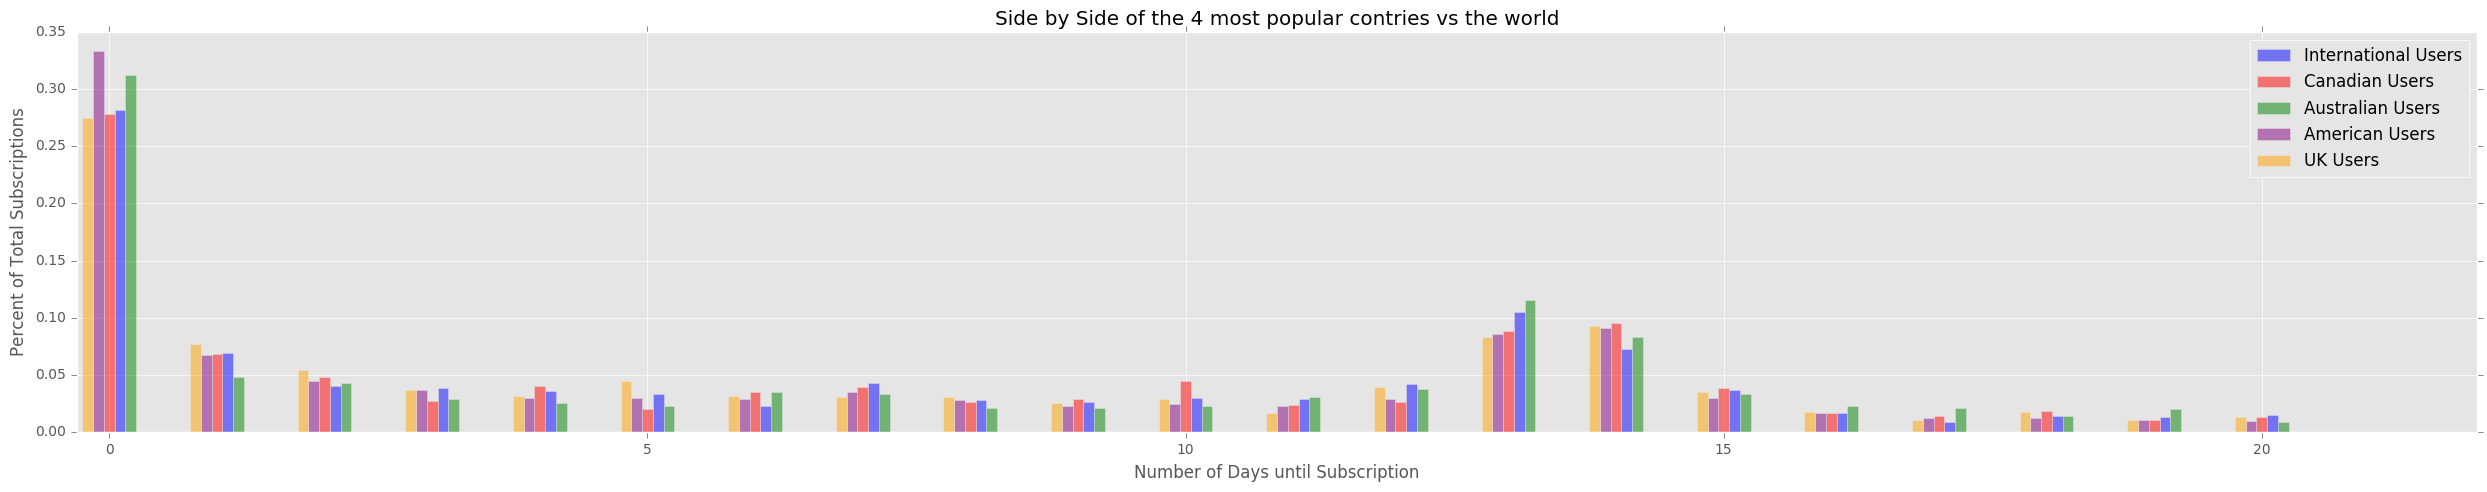

In [21]:
internationSubs=df[(df.subLag < np.timedelta64(3,'W'))&((df.trial_country!='Canada')&(df.trial_country!='Australia')&(df.trial_country!='United States')&(df.trial_country!='United Kingdom'))]
internationPlot=internationSubs.subLag.groupby([df.subLag.dt.days]).count()
canSubs=df[(df.subLag < np.timedelta64(3,'W'))&(df.trial_country=='Canada')]
canPlot=canSubs.subLag.groupby([canSubs.subLag.dt.days]).count()
ausSubs=df[(df.subLag < np.timedelta64(3,'W'))&(df.trial_country=='Australia')]
ausPlot=ausSubs.subLag.groupby([df.subLag.dt.days]).count()
usaSubs=df[(df.subLag < np.timedelta64(3,'W'))&(df.trial_country=='United States')]
usaPlot=usaSubs.subLag.groupby([df.subLag.dt.days]).count()
ukSubs=df[(df.subLag < np.timedelta64(3,'W'))&(df.trial_country=='United Kingdom')]
ukPlot=ukSubs.subLag.groupby([df.subLag.dt.days]).count()


inorm=internationPlot/sum(internationPlot)
cnorm=canPlot/sum(canPlot)
anorm=ausPlot/sum(ausPlot)
unorm=usaPlot/sum(usaPlot)
uknorm=ukPlot/sum(ukPlot)
pyplt.axes([0, 1, 4, 1])
pyplt.axis([-.3,22,0,.35])
pyplt.bar(inorm.index+.05, inorm,  width=0.1,alpha=.5, color='Blue', label='International Users')
pyplt.bar(cnorm.index-.05,    cnorm,  width=0.1,alpha=.5, color='Red', label='Canadian Users')
pyplt.bar(anorm.index+.15, anorm,  width=0.1,alpha=.5, color='Green', label='Australian Users')
pyplt.bar(unorm.index-.15, unorm,  width=0.1,alpha=.5, color='Purple', label='American Users')
pyplt.bar(uknorm.index-.25,uknorm, width=0.1,alpha=.5, color='Orange', label='UK Users')

pyplt.title('Side by Side of the 4 most popular contries vs the world')
pyplt.legend(loc='upper right')
pyplt.xlabel('Number of Days until Subscription')
pyplt.ylabel('Percent of Total Subscriptions')


pyplt.show()

For all other countries there are less than 200 subscribers and I am worried the data will get noisy. Let's see if any of them have particuarly high yeild rates or if they are all grouped together.  

My decision is to issue the top four contries and leave the rest with indicator varaible as i believe that sample size is not large enough to add them into the dataset as is.  It might be possible to group them by continent or similar groupings to make the sample size significant.  This might be revisited if I am unhappy with the model results. <br>
<tab> Link to Python Package to help with this: https://pypi.python.org/pypi/incf.countryutils


### Day of the Week 
    my goal is to determine how to handle the day of the week, and what (if any) indicator variables should be added. 

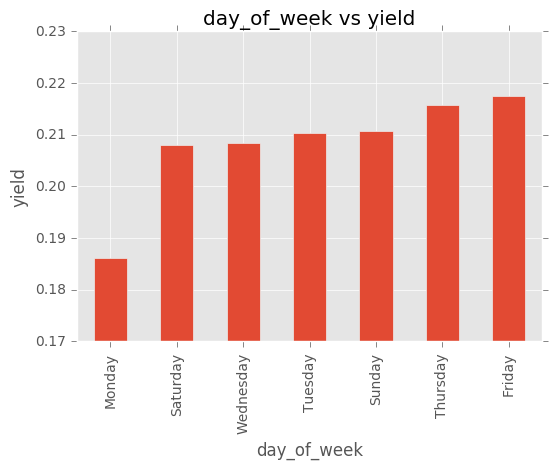

In [29]:
(df.sub_dateTime.groupby(df.day_of_week).count()/df.trial_date.groupby(df.day_of_week).count()).sort_values().plot(kind='bar')
# TODO: fix spelling 
pyplt.title('day_of_week vs yield')
pyplt.xlabel('day_of_week')
pyplt.ylabel('yield')
pyplt.axis([-.5,6.5,.17,.23])
pyplt.show()

From this chart Monday should definetly have it's own variable.  Now the other pairings get interesting.  There seems to be 5 groupings: that make sense numerically as well as logicaly.  We don't need to add the Friday variable.
<ul>
<li>1) Monday  </li>
<li>2) Tuesday and Wednesday  </li>
<li>3) Saturday and Sunday   </li>
<li>4) Thursday </li>
<li>5) Friday </li>
</ul>

We could attempt formal hypothesis testing to confirm this my gut is saying it might be better to just lump them all in. 

In [27]:
#Way to do the calculation 
a=(df.sub_dateTime.groupby(df.day_of_week).count()/df.trial_date.groupby(df.day_of_week).count()).sort_values()
abs(a['Thursday']-a['Friday'])

0.001855981639032861

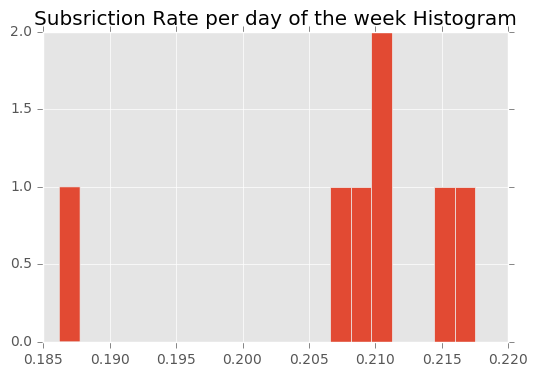

---  Data Dump  ---
day_of_week
Monday       0.186208
Saturday     0.207963
Wednesday    0.208375
Tuesday      0.210274
Sunday       0.210777
Thursday     0.215679
Friday       0.217535
dtype: float64


In [28]:
(df.sub_dateTime.groupby(df.day_of_week).count()/df.trial_date.groupby(df.day_of_week).count()).hist(bins=20)
pyplt.title('Subsriction Rate per day of the week Histogram')
pyplt.show()
print('---  Data Dump  ---')
print((df.sub_dateTime.groupby(df.day_of_week).count()/df.trial_date.groupby(df.day_of_week).count()).sort_values())

In [85]:
# TODO : Generate data transform for the previous model's hit rate if i am going with 7 models then we are going to need 6 cols 
# trying to generate a function that would work 
testdf=df[df.trial_date=='2013-05-16']
# make sure query structure is working 
print('--start day testing--')
print(testdf[(testdf.subLag != np.timedelta64(0, 's')) & (testdf.subLag < np.timedelta64(1, 'D')) ].sample(10).subLag)
print('--interval testing--')
print('interval for days 2-4')
print(testdf[(testdf.subLag >= np.timedelta64(2, 'D')) & (testdf.subLag < np.timedelta64(4, 'D')) ].sample(10).subLag)

--start day testing--
35051   02:00:00
34886   01:00:00
36067   04:00:00
35220   01:00:00
34856   13:00:00
36655   14:00:00
35048   04:00:00
36026   01:00:00
35769   02:00:00
35081   03:00:00
Name: subLag, dtype: timedelta64[ns]
--interval testing--
34970   3 days 00:00:00
36337   2 days 00:00:00
37102   3 days 02:00:00
36607   2 days 13:00:00
35815   2 days 06:00:00
36905   3 days 00:00:00
36704   3 days 06:00:00
35004   3 days 01:00:00
34957   2 days 21:00:00
35056   3 days 01:00:00
Name: subLag, dtype: timedelta64[ns]


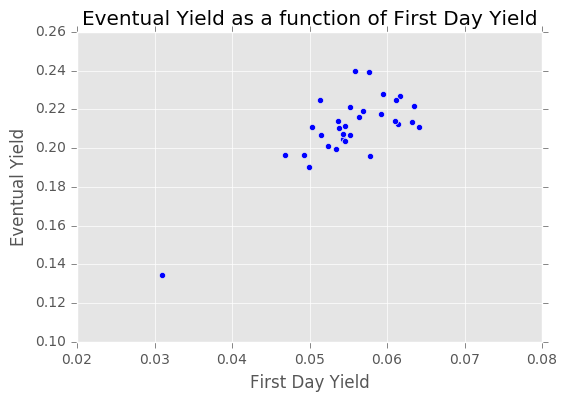

In [19]:
numS=df.sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
numS0=df[df.subLag < np.timedelta64(1, 'D')].sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
tp=pd.concat([numS, numS0], axis=1)
pyplt.scatter(numS0, numS)
pyplt.title('Eventual Yield as a function of First Day Yield')
pyplt.xlabel('First Day Yield')
pyplt.ylabel('Eventual Yield')
pyplt.show()

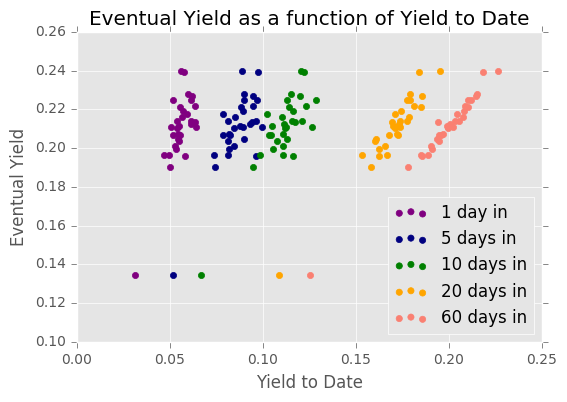

In [70]:
numS=df.sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
numS0=df[df.subLag < np.timedelta64(1, 'D')].sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
numS10=df[df.subLag < np.timedelta64(10, 'D')].sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
numS20=df[df.subLag < np.timedelta64(20, 'D')].sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
numS30=df[df.subLag < np.timedelta64(60, 'D')].sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
numS5=df[df.subLag < np.timedelta64(5, 'D')].sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
tp=pd.concat([numS, numS0], axis=1)
pyplt.scatter(numS0, numS,color='Purple')
pyplt.scatter(numS5, numS,color='Navy')
pyplt.scatter(numS10, numS,color='Green')
pyplt.scatter(numS20, numS,color='Orange')
pyplt.scatter(numS30, numS,color='Salmon')
pyplt.title('Eventual Yield as a function of Yield to Date')
pyplt.xlabel('Yield to Date')
pyplt.ylabel('Eventual Yield')
pyplt.legend(['1 day in','5 days in','10 days in','20 days in','60 days in'], loc = 'lower right')
pyplt.show()

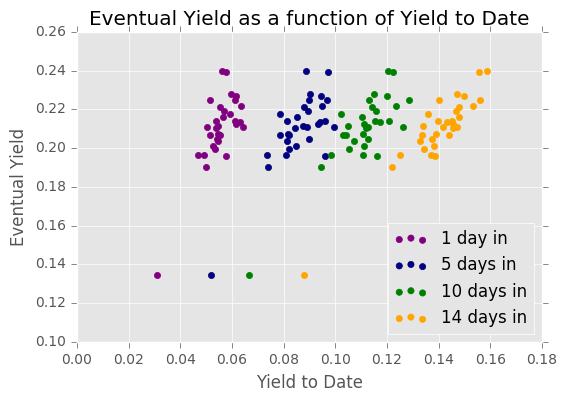

In [69]:
numS=df.sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
numS0=df[df.subLag < np.timedelta64(1, 'D')].sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
numS10=df[df.subLag < np.timedelta64(10, 'D')].sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
numS20=df[df.subLag < np.timedelta64(14, 'D')].sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
numS30=df[df.subLag < np.timedelta64(60, 'D')].sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
numS5=df[df.subLag < np.timedelta64(5, 'D')].sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
tp=pd.concat([numS, numS0], axis=1)
pyplt.scatter(numS0, numS,color='Purple')
pyplt.scatter(numS5, numS,color='Navy')
pyplt.scatter(numS10, numS,color='Green')
pyplt.scatter(numS20, numS,color='Orange')
#pyplt.scatter(numS30, numS,color='Salmon')
pyplt.title('Eventual Yield as a function of Yield to Date')
pyplt.xlabel('Yield to Date')
pyplt.ylabel('Eventual Yield')
pyplt.legend(['1 day in','5 days in','10 days in','14 days in','60 days in'], loc = 'lower right')
pyplt.show()

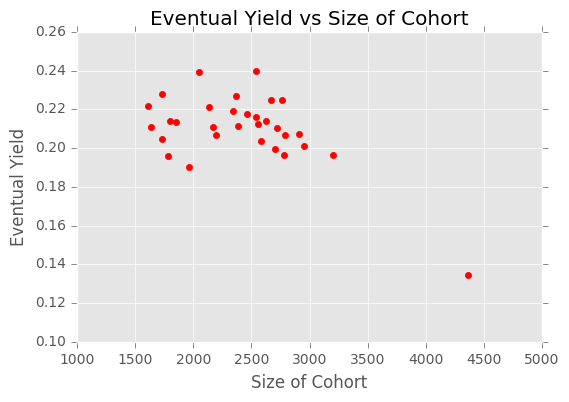

In [54]:
numS=df.sub_label.groupby([df['trial_date']]).sum()/df.sub_label.groupby([df['trial_date']]).count()
numS0=df.sub_label.groupby([df['trial_date']]).count()
tp=pd.concat([numS, numS0], axis=1)
pyplt.scatter(numS0, numS,color='Red')
pyplt.title('Eventual Yield vs Size of Cohort')
pyplt.xlabel('Size of Cohort')
pyplt.ylabel('Eventual Yield')
pyplt.show()

In [28]:
#print(testdf[(testdf.subLag != np.timedelta64(0, 's')) & (testdf.subLag < np.timedelta64(1, 'D')) ].id.count())
#print( testdf.id.count())
#a=time.time()
#print(testdf[(testdf.subLag != np.timedelta64(0, 's')) & (testdf.subLag < np.timedelta64(1, 'D')) ].id.count()/testdf.id.count())
#b=time.time()
#print((b-a)*70000)
#print (':(')

# start code that would migrate into a functin that takes diff as a param 
cScore={}
diff=np.timedelta64(0, 'D')
t1=time.time()
for row in df.trial_date.unique():
    sdf=df[df.trial_date==row]
    # calculate day0 yield 
    if diff >= np.timedelta64(1, 'D'):
        i1=sdf[(sdf.subLag != np.timedelta64(0, 's')) & (sdf.subLag < np.timedelta64(1, 'D')) ].id.count()
    else: 
        i1=0
    # calculate yield to date 
    i2=sdf[(sdf.subLag != np.timedelta64(0, 's')) & (sdf.subLag < diff) ].id.count()
    # etc etc 
    c=sdf.id.count()
    cScore[row]=(row,c,i1/c,i2/c)
#print (cScore[np.datetime64('2013-05-01T00:00:00.000000000')])
toAdd=pd.DataFrame.from_dict(cScore,orient='index')
toAdd.columns = ['trial_date','cohort_numTrials', 'cohort_day0_yield','cohort_ytd']
test=df.join(toAdd, on='trial_date',rsuffix='throwaway')
test.drop(['trial_datethrowaway','Unnamed: 0'],inplace=True,axis=1)
t2=time.time()
print(t2-t1)
#print(((b-a)*70000)/(t2-t1))
print(':)')

0.2491769790649414
:)


In [29]:
test

,id,trial_date,trial_hour,day_of_week,trial_country,subscription_date,sub_hour_start,sub_label,trial_dateTime,sub_dateTime,...,can,aus,mon,tueSun,wedSat,thr,fri,cohort_numTrials,cohort_day0_yield,cohort_ytd
0,51809381e4b03c6b86a6256f,2013-05-01,0,Wednesday,United States,2013-05-14,23.0,1,2013-05-01 00:00:00,2013-05-14 23:00:00,...,0,0,0,0,1,0,0,2699,0.0,0.0
1,518093ade4b00cbd5d9abe26,2013-05-01,0,Wednesday,United States,NaT,NaN,0,2013-05-01 00:00:00,NaT,...,0,0,0,0,1,0,0,2699,0.0,0.0
2,518093d6e4b0c1fda9c05d54,2013-05-01,0,Wednesday,United States,2013-05-15,20.0,1,2013-05-01 00:00:00,2013-05-15 20:00:00,...,0,0,0,0,1,0,0,2699,0.0,0.0
3,518093f2e4b0b0f0caf55867,2013-05-01,0,Wednesday,United States,NaT,NaN,0,2013-05-01 00:00:00,NaT,...,0,0,0,0,1,0,0,2699,0.0,0.0
4,518093fee4b01eeb7aec8bfc,2013-05-01,0,Wednesday,United States,NaT,NaN,0,2013-05-01 00:00:00,NaT,...,0,0,0,0,1,0,0,2699,0.0,0.0
5,5180940de4b0f2c075968561,2013-05-01,0,Wednesday,United States,2013-05-02,22.0,1,2013-05-01 00:00:00,2013-05-02 22:00:00,...,0,0,0,0,1,0,0,2699,0.0,0.0
6,51809433e4b00f39571980e8,2013-05-01,0,Wednesday,United States,NaT,NaN,0,2013-05-01 00:00:00,NaT,...,0,0,0,0,1,0,0,2699,0.0,0.0
7,51809449e4b01d30b4a23394,2013-05-01,0,Wednesday,Canada,NaT,NaN,0,2013-05-01 00:00:00,NaT,...,1,0,0,0,1,0,0,2699,0.0,0.0
8,51809464e4b0b0f0caf559a3,2013-05-01,0,Wednesday,United States,2013-05-02,14.0,1,2013-05-01 00:00:00,2013-05-02 14:00:00,...,0,0,0,0,1,0,0,2699,0.0,0.0
9,5180946be4b0b0f0caf55a1f,2013-05-01,0,Wednesday,Indonesia,NaT,NaN,0,2013-05-01 00:00:00,NaT,...,0,0,0,0,1,0,0,2699,0.0,0.0


## 3) Cubic Spline Model
    This is a naive atempt at a fit.  It has a lot of issues just trying to see how 'simple' we can get away with

In [29]:
from scipy.interpolate import interp1d
x=range(0,len(toPlot.values))
f = interp1d(x, toPlot.values,kind='cubic')
ynew = f(x)

27.573269514
Estimate
524.493477013
Actual
533
Normed
0.984040294583


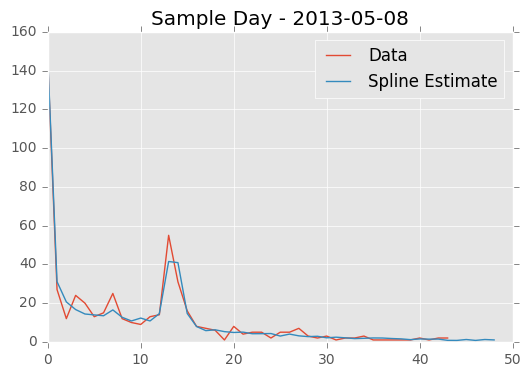

In [30]:
tDate='2013-05-08'
sdf=df[(df.subLag < np.timedelta64(7,'W'))&(df.trial_date == np.datetime64(tDate))]
# scale factor calc 
scaleFactor=df.count()[0]/df[df.trial_date == np.datetime64(tDate)].count()[0]
print(scaleFactor)
toPlot=sdf.subLag.groupby([df.subLag.dt.days]).count()
x2=range(0,len(toPlot.values))
pyplt.plot(x2,toPlot.values,x, ynew/scaleFactor)
pyplt.title('Sample Day - '+str(tDate))
pyplt.legend(["Data", "Spline Estimate"])
print('Estimate')
a=sum(ynew/scaleFactor)
print(a)
print('Actual')
b=sum(sdf.subLag.groupby([df.subLag.dt.days]).count())
print(b)
print('Normed')
print(1-abs(a-b)/b)

In [155]:
arr=[]
for i in range (1,31):
    if i < 10:
        tDate='2013-05-0'+str(i)
    else:
        tDate='2013-05-'+str(i)
    sdf=df[(df.subLag < np.timedelta64(7,'W'))&(df.trial_date == np.datetime64(tDate))]
    # scale factor calc 
    scaleFactor=df.count()[0]/df[df.trial_date == np.datetime64(tDate)].count()[0]
    #print(scaleFactor)
    toPlot=sdf.subLag.groupby([df.subLag.dt.days]).count()
    x2=range(0,len(toPlot.values))
    #pyplt.plot(x2,toPlot.values,x, ynew/scaleFactor, '-')
    a=sum(ynew/scaleFactor)
    b=sum(sdf.subLag.groupby([df.subLag.dt.days]).count())
    ratio = 1-abs(a-b)/b
    arr.append(ratio)
    if ratio <.5: 
        print (tDate)
print (sum(arr)/len(arr))



2013-05-20
0.935285799088


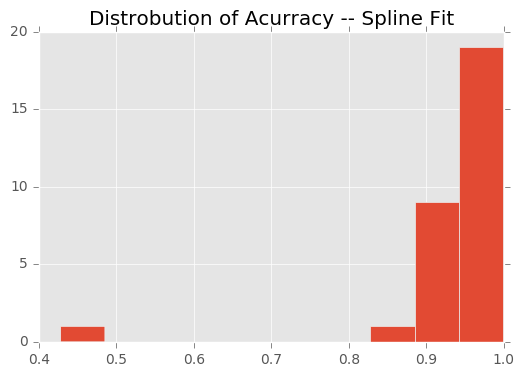

In [156]:
pyplt.hist(arr)
#todo spelling 
pyplt.title('Distrobution of Acurracy -- Spline Fit')
pyplt.show()

In [33]:
print (arr[19]) # this is a significant outlier lets look at it 

0.428078880126


Estimate
842.549720253
Actual
536
Normed
0.428078880126


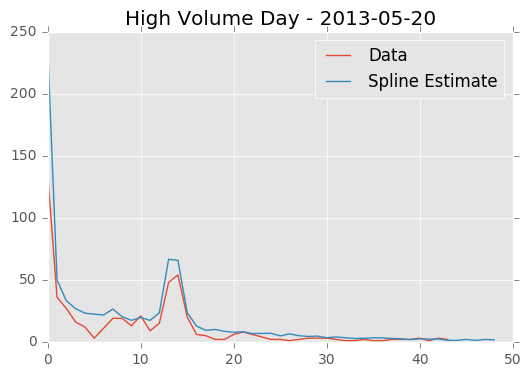

In [34]:
tDate='2013-05-20'
sdf=df[(df.subLag < np.timedelta64(7,'W'))&(df.trial_date == np.datetime64(tDate))]
# scale factor calc 
scaleFactor=df.count()[0]/df[df.trial_date == np.datetime64(tDate)].count()[0]
#print(scaleFactor)
toPlot=sdf.subLag.groupby([df.subLag.dt.days]).count()
x2=range(0,len(toPlot.values))
pyplt.plot(x2,toPlot.values,x, ynew/scaleFactor)
pyplt.title('High Volume Day - '+str(tDate))
pyplt.legend(["Data", "Spline Estimate"])
print('Estimate')
a=sum(ynew/scaleFactor)
print(a)
print('Actual')
b=sum(sdf.subLag.groupby([df.subLag.dt.days]).count())
print(b)
print('Normed')
print(1-abs(a-b)/b)

We can see here what is causing our prediction to fail. we are getting an abnormaly large spike in users signing up for trials with roughly the same number subscribing causing the simple spline fit to whiff pretty badly here. 

In [38]:
sampleDf=df.sample(1000)
sampleDf.to_csv('Sample_Strategy_Data_Set.csv')

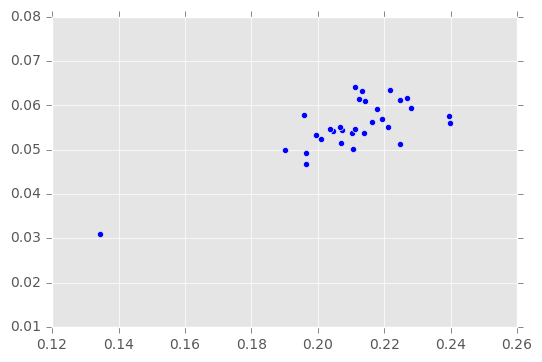

In [23]:
numS=df.trial_hour.unique()

In [24]:
numS

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)